### 1. Max-flow to min-cost

#### a)
Denote nodes on the first line as 1,2,4,6,7,respectively from left to right; denote nodes on the second line as 3,5,6, respectively from left to right.<br>
$x_{ij}$ is the flow from i to j, $(i,j) \in \varepsilon$

let x =\begin{bmatrix}
x_{12}\\
x_{13}\\
x_{24}\\
x_{34}\\
x_{35}\\
x_{46}\\
x_{57}\\
x_{67}\\
\end{bmatrix}
Then A =\begin{bmatrix}
1&1&0&0&0&0&0&0\\
-1&0&1&0&0&0&0&0\\
0&-1&0&1&1&0&0&0\\
0&0&-1&-1&0&1&0&0\\
0&0&0&0&-1&0&1&0\\
0&0&0&0&0&-1&0&1\\
0&0&0&0&0&0&-1&-1\\
\end{bmatrix}
$q_{ij}$ is the maximum flow from i to j,$(i,j) \in \varepsilon$.<br>
q = \begin{bmatrix}
3\\
2\\
1\\
4\\
2\\
3\\
3\\
2\\
\end{bmatrix}
$p_{ij}$ is the minimum flow from i to j,$(i,j) \in \varepsilon$.<br>
p = \begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}

#### b)
We transform the max flow problem into min-cost flow problem. <br>
In such case, x =\begin{bmatrix}
x_{12}\\
x_{13}\\
x_{24}\\
x_{34}\\
x_{35}\\
x_{46}\\
x_{57}\\
x_{67}\\
x_{71}\\
\end{bmatrix}
p and q don't change much,except for the constraint of the added feedback path.<br>
p = \begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}
q = \begin{bmatrix}
3\\
2\\
1\\
4\\
2\\
3\\
3\\
2\\
\infty\\
\end{bmatrix}
c = \begin{bmatrix}
0&0&0&0&0&0&0&0&1\\
\end{bmatrix}
since the objective is max, if the objective is min, 1 at the end should be -1 <br>
b = \begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}

#### c)
The minimum cut of the this graph is 3, the edges in cut are (1,3) and (2,4).<br>
The variables in the dual problem has the relations:<br>
$\mu_j - \mu_i = \lambda{ij}$<br> 
$\mu_1 = 0$<br> 
$\mu_7 = 1$<br>
$\mu_1<=\mu_2<=\mu_4<=\mu_6<=\mu_7$,
$\mu_1<=\mu_3<=\mu_4<=\mu_6<=\mu_7$,
$\mu_1<=\mu_3<=\mu_5<=\mu_7$


### 2. The chess problem

#### a)

In [2]:
using JuMP, Clp
m = Model(solver=ClpSolver())
@variable(m,s>=0)
@variable(m,l>=0)
@constraint(m, 3s + 2l <= 160)
@constraint(m, s + 4l <= 200)
@objective(m, Max, 5s+8l)
status = solve(m)
println(getobjectivevalue(m))
m

472.0


Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is Clp

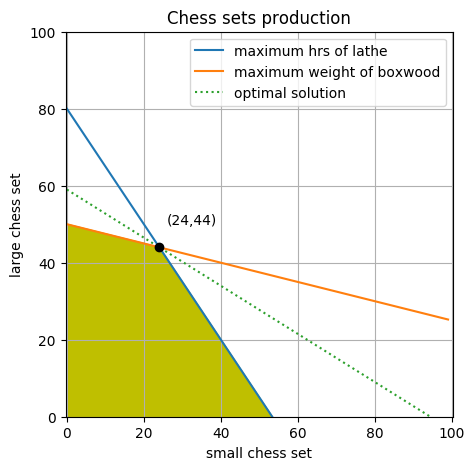

In [3]:
using PyPlot
figure(figsize=(5,5))

w = collect(0:3:100)

y1 = [80 .- (3/2)w[i] for i=1:length(w)]
plot( w, y1)    

y2 = [50 .- (1/4)w[i]  for i=1:length(w)]
plot( w, y2)         

y3 = [472/8 .- (5/8)w[i] for i=1:length(w)]
plot( w, y3, ":")          
plot(24, 44, "k.", markersize=12)
text( 26,50, "(24,44)")
grid(); axis("equal"); axis([0,100,0,100]);
xlabel("small chess set");  ylabel("large chess set")
fill([0, 0, 24, 160/3, 0], [0, 50, 44, 0, 0],color = "y")
legend(["maximum hrs of lathe", "maximum weight of boxwood","optimal solution"])
title("Chess sets production");

In [4]:
using JuMP, Clp
A = [3 1;2 4]
c = [160;200]
b = [5;8]
m = Model(solver=ClpSolver())
@variable(m,x[1:2]>=0) 
@constraint(m,A*x.>=b)
@objective(m, Min,c'*x)
status = solve(m)
println(getobjectivevalue(m))
m

471.99999999999994


Minimization problem with:
 * 2 linear constraints
 * 2 variables
Solver is Clp

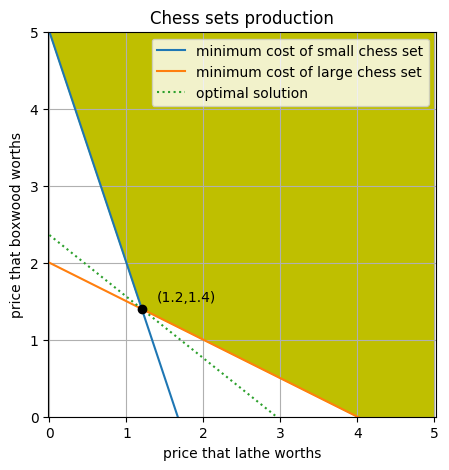

In [5]:
using PyPlot
figure(figsize=(5,5))

w = collect(0:3:10)

y1 = [5 .- 3w[i] for i=1:length(w)]
plot( w, y1)    

y2 = [2 .- (1/2)w[i]  for i=1:length(w)]
plot( w, y2)         

y3 = [472/200 .- (4/5)w[i] for i=1:length(w)]
plot( w, y3, ":")          
plot(1.2, 1.4, "k.", markersize=12)
text( 1.4,1.5, "(1.2,1.4)")
grid(); axis("equal"); axis([0,5,0,5]);
xlabel("price that lathe worths");  ylabel("price that boxwood worths")
fill([0, 1.2, 4, 5, 5], [5, 1.4, 0, 0, 5],color = "y")
legend(["minimum cost of small chess set", "minimum cost of large chess set","optimal solution"])
title("Chess sets production");

### 3. Stigler's supplement

#### a)

In [10]:
using NamedArrays, CSV

# import Stigler's data set
raw = CSV.read("stigler.csv");
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

# list of food
foods = raw[2:end,1]
# list of nutrients
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]

# minimum required amount of each nutrient
lower = Dict( zip(nutrients,raw[1,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f 
dataraw = convert(Matrix, raw[2:end,2:end])
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))


77×9 Named Array{Union{Missing, Float64},2}
      foods ╲ nutrients │     Calories (1000)  …   Ascorbic Acid (mg)
────────────────────────┼────────────────────────────────────────────
Wheat Flour (Enriched)  │                44.7  …                  0.0
Macaroni                │                11.6                     0.0
Wheat Cereal (Enriched) │                11.8                     0.0
Corn Flakes             │                11.4                     0.0
Corn Meal               │                36.0                     0.0
Hominy Grits            │                28.6                     0.0
Rice                    │                21.2                     0.0
Rolled Oats             │                25.3                     0.0
White Bread (Enriched)  │                15.0                     0.0
Whole Wheat Bread       │                12.2                     0.0
Rye Bread               │                12.4                     0.0
Pound Cake              │                 8.0 

In [7]:
# Write as a linear dual program and solve!

using JuMP,Clp
m = Model(solver=ClpSolver())

@variable(m, λ[nutrients] >= 0)
for i in foods
    @constraint(m, sum( data[i,j]* λ[j] for j in nutrients ) <= 1 )
end

@objective(m, Max, sum(lower[i].*λ[i] for i in nutrients))
status = solve(m)
println("The optimal (daily) diet is:")
for i in nutrients
        println(i, ": ", getvalue(λ[i]))
end
println()
println("The cost per year is: \$", 365*getobjectivevalue(m))
println("The most amount to pay per pill is: \$", getvalue(λ["Calcium (g)"])/2)


The optimal (daily) diet is:
Calories (1000): 0.008765147298049485
Protein (g): 0.0
Calcium (g): 0.03173771344563715
Iron (mg): 0.0
Vitamin A (1000 IU): 0.00040023272172538176
Thiamine (mg): 0.0
Riboflavin (mg): 0.016358032699276687
Niacin (mg): 0.0
Ascorbic Acid (mg): 0.00014411751545899702

The cost per year is: $39.661731545466274
The most amount to pay per pill is: $0.015868856722818576


#### b)

In [9]:
using JuMP,Clp
m = Model(solver=ClpSolver())

@variable(m, x[foods] >= 0)
@variable(m, c >= 0)
for j in nutrients
    if j == "Calcium (g)"
        @constraint(m, sum( data[i,j]*x[i] for i in foods ) + 0.5*c >= lower[j])
    else
        @constraint(m, sum( data[i,j]*x[i] for i in foods ) >= lower[j])
    end
end
@objective(m, Min, sum(x) + 0.01*c)

solve(m)
println("The optimal (daily) diet is:")
xopt = getvalue(x)
for i in foods
    if xopt[i] > 1e-6
        println(i, ": ", xopt[i])
    end
end
println("Calcium Pill: ", getvalue(c))
println()
println("The cost per year is: \$", 365*getobjectivevalue(m))
println("The saved amount is: \$", 39.79866435040896 - 365*getobjectivevalue(m))

The optimal (daily) diet is:
Wheat Flour (Enriched): 0.06598060307911847
Liver (Beef): 0.007844338921201144
Cabbage: 0.011195027632464829
Spinach: 0.003911295356684475
Calcium Pill: 1.2433796310553271

The cost per year is: $36.998247374508104
The saved amount is: $2.800416975900859
